In [1]:
import numpy as np
import pandas as pd
class Machine_Replacement:
    def __init__(self,rep_cost=0.7,nS=6,nA=2):
        self.nS = nS;
        self.nA = nA;
        self.cost = np.linspace(0.1, 0.99,nS);
        self.rep_cost = rep_cost;
    def gen_probability(self):
        self.P = np.zeros((self.nA,self.nS,self.nS));
        for i in range(self.nS):
            for j in range(self.nS):
                if(i<=j):
                    self.P[0,i,j]=(i+1)*(j+1);
                else:
                    continue;
            self.P[0,i,:]=self.P[0,i,:]/np.sum(self.P[0,i,:])
            self.P[1,i,0]=1;
        return self.P;
    def gen_reward(self):
        self.R=np.zeros((self.nA,self.nS,self.nS));
        for i in range(self.nS):
            self.R[0,i,:] = self.cost[i];
            self.R[1,i,0] = self.rep_cost+self.cost[0];
        return self.R;
    def gen_expected_reward(self):
        self.R = np.zeros((self.nA,self.nS));
        for i in range(self.nS):
            self.R[0,i] = self.cost[i];
            self.R[1,i] = self.rep_cost + self.cost[0];
        return self.R;

In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Aug 12 16:59:27 2022

@author: Sourav
"""
class Target_Policy:
    '''
        First we create an initiualizer function namely a constructor to initialize the variables
        with initial data values
    '''
    def __init__(self,S,A,P,R,start):
        self.S=S # represant the states of the MDP
        self.nS = len(S) # Reperesants the number of states of the MDP
        self.nA = len(A);# Represants the number of actions in the MDP
        self.P=P # Represants the true Probability function
        self.R=R # Represants the true Reward  function
        self.A=A;# Represnats the Action Space
        self.K_pol = []; # To store all the policies
        self.s_start=start # Store the start state 
    '''
        In the generate_next_state(), we are generating our next state to be visited based on the following input parameters
        s : Current state
        a : Current action
    '''    
    def generate_next_state(self,s,a):
        #p = np.zeros(self.nS)
        p = self.P[a][s][:] # extrcat all the probabilities of the different statestransition given current s and a
        #print(p);
        return (np.argmax(np.random.multinomial(1,p)))
    
    '''
        Single function to find the plot between the cumulative regret generated by different algorithms
        Parameters:
            reg_list : A list containing the regret value at different runs instances averaged over several time
    '''    
    def plot_data(self,reg_list):
        plt.plot(np.arange(len(reg_list)),np.cumsum(np.array(reg_list)),marker = '+'); 
    '''
        Function to find the optimum policy out of the K policies found out.
        Parameters:
            runs : To find for how many runs the current policy to be runned
            T : Each run consisiting of how many time steps to find the average reward for each policy in one run
            Time complexity : O(#(policies) x #(episode runs) x #(number of Time steps in one episode))
    '''
    def find_optimum_policy(self):
        self.find_policies(); #Call the find_policies() to find all the policies and store it in 'self.K' list
        final_R = np.zeros(len(self.K_pol));
        for idx,pol in enumerate(self.K_pol):
            #policy = self.one_hot(pol);
            beh_obj = beh_pol_sd(self.P, pol, self.nS, self.nA)
            state_distribution = beh_obj.state_distribution_simulated(1);
            final_R[idx] = sum([state_distribution[state] *self.R[int(pol[state]),state] for state in range(self.nS)]);
        for l_pol in range(len(self.K_pol)):
            print(self.K_pol[l_pol],"    ====>    ",final_R[l_pol]); # Display the the expected reward for each policy
        return (final_R,self.K_pol[np.argmin(final_R)],np.min(final_R));# Return the minimum reward, the policy number which gives the minimum reward and the policy that gives minimum reward
    
    def find_policies(self):
        self.K_pol = [];
        pol=np.zeros(self.nS) # First policy is all 0's
        self.K_pol.append(np.array(pol)); # append it to our K_policy list namely self.K
        for i in reversed(range(self.nS)):
            pol[i] = 1; # Come from the end and since the structure is thresholding nature so make each position 1 from 0 and append the same
            print(pol);
            self.K_pol.append(np.array(pol));
        print(len(self.K_pol)," policies found");
    
    '''
        This function run_algo() is responsible running the list of algorithms meant to be compared.
        Parameters:
            runs : Specify number of episodes runs
            Time_runs : Specify for how much time each episode should run to find maximum policy
            tau : Pass as input to pUCB and pThompson algorithms to specify practical infinite runs
            beta : Pass as input to pUCB algorithm to find the confidence bound c[k] = beta[t] * sqrt(2 * log(t)/n(k))
            regret_runs : How many times the algorithm to be learned so that it can send the cumulative reward in order to find 
            the regret.
    
    def run_algo(self,runs,Time_runs,tau,beta,regret_runs):
        max_expected_rew,max_expected_policy_number,max_policy = self.find_maximum_policy(runs,Time_runs)
        reg_list = [];
        for run in range(regret_runs):
            ob1 = pUCB(Time_runs,self.K_pol,self.P,self.R,self.nS,self.nA,beta,self.s_start,tau);
            cum_ret,n_episodes = ob1.run_algo()
            reg_list.append(max_expected_rew * n_episodes - cum_ret);
        self.plot_data(reg_list);
        print(len(reg_list))'''
'''nS,nA = 10,2
rep_cost = 0.7
mr_obj = Machine_Replacement(rep_cost,nS,nA);
P = mr_obj.gen_probability();
R = mr_obj.gen_expected_reward();
start = 0;
tp = Target_Policy(np.arange(nS), np.arange(nA), P, R, start)
tp.find_optimum_policy()'''

'nS,nA = 10,2\nrep_cost = 0.7\nmr_obj = Machine_Replacement(rep_cost,nS,nA);\nP = mr_obj.gen_probability();\nR = mr_obj.gen_expected_reward();\nstart = 0;\ntp = Target_Policy(np.arange(nS), np.arange(nA), P, R, start)\ntp.find_optimum_policy()'

In [3]:
#import numpy as np
#from River_swim_env_create_new_env import River_Swim
class beh_pol_sd:
    def __init__(self,P,policy,nS,nA):
        self.P = P
        self.policy = policy
        self.nS = nS;
        self.nA = nA;
    
    def onehot(self):
        pol = np.zeros((self.nS,self.nA));
        for i in range(self.nS):
            pol[i][int(self.policy[i])]=1;
        return pol;
    def find_transition_matrix(self,onehot_encode=1):
        if(onehot_encode==1):
            self.policy = self.onehot()
        T_s_s_next = np.zeros((self.nS,self.nS));
        for s in range(self.nS):
            for s_next in range(self.nS):
                for a in range(self.nA):
                    #print(s,s_next,a);
                    #print(T[a,s,s_next]);
                    T_s_s_next[s,s_next]+=self.P[a,s,s_next]*self.policy[s,a];
        return T_s_s_next;
    def state_distribution_simulated(self,onehot_encode=1):
        P_policy = self.find_transition_matrix(onehot_encode)
        #print(P_policy);
        P_dash = np.append(P_policy - np.eye(self.nS),np.ones((self.nS,1)),axis=1);
        #print(P_dash);
        P_last = np.linalg.pinv(np.transpose(P_dash))[:,-1]
        return P_last;

In [4]:
def one_hot(target_policy,nS,nA):
    tp=np.zeros((nS,nA));
    for j in range(nS):
        tp[j][int(target_policy[j])] = 1;
    return np.array(tp);

In [5]:
class get_hyperparameters:
    def __init__(self):
        self.T = 50000;
        self.runs = 10;
        self.lr = 0.1;
        self.batch_size = 50;
        self.start = 0;
        self.nS = 4;
        self.nA = 2;
        self.rep_cost = 0.7
        self.alpha = 0.2
        self.gamma = 0.95
    
    def ret_hyperparameters(self):
        return (self.T,self.runs,self.lr,self.batch_size,self.start,self.nS,self.nA,self.rep_cost,self.alpha,self.gamma)

In [6]:
T,runs,lr,batch_size,start,nS,nA,rep_cost,alpha,gamma = get_hyperparameters().ret_hyperparameters();
rep_cost,nS,nA = 0.7,4,2
alpha = 0.1;
start = 0;
gamma = 0.9;
values = np.zeros((int(T/batch_size),runs))
values2 = np.zeros((int(T/batch_size),runs))
mr_obj = Machine_Replacement(rep_cost,nS,nA);
P,R = mr_obj.gen_probability(),mr_obj.gen_expected_reward()
for run in range(runs):
    Q_table = np.random.random((nS,nA));
    Q_table_2 = np.random.random((nS,nA));
    state = start
    for t in range(1,T+batch_size):
        if(t%batch_size==0):
            policy = np.array([np.argmin(Q_table[state,:]) for state in range(nS)]);
            policy = one_hot(policy,nS,nA);
            #print(policy);
            #input();
            sd = beh_pol_sd(P, policy, nS, nA).state_distribution_simulated(0)
            values[int(t/batch_size)-1,run] = sum([R[np.argmin(Q_table[state,:]),state]*sd[state] for state in range(nS)])
            values2[int(t/batch_size)-1,run] = sum([R[np.argmin(Q_table_2[state,:]),state]*sd[state] for state in range(nS)])
        if(np.random.random()<0.1):
            action = np.random.choice(nA);
        else:
            action = np.argmin(Q_table[state,:]);
        next_state = np.argmax(np.random.multinomial(1,P[action,state,:]));
        Q_table[state,action] = Q_table[state,action] + alpha*(R[action,state]+gamma * np.min(Q_table[next_state,:])-Q_table[state,action])
        Q_table_2[state,action] = (1-alpha)*Q_table_2[state,action] + alpha * (R[action,state] +(np.min(Q_table_2[state,:]))-np.min(Q_table_2[1,:]));
        state = next_state

In [7]:
pd.DataFrame(values).to_excel('Q_value_function_epsilon_greedy.xlsx');
pd.DataFrame(values2).to_excel('Q_value_with_relative_value_.xlsx');

In [8]:
tp_obj = Target_Policy(np.arange(nS),np.arange(nA),P,R,0)
policies,optimal_pol,optimal_vf = tp_obj.find_optimum_policy()

[0. 0. 0. 1.]
[0. 0. 1. 1.]
[0. 1. 1. 1.]
[1. 1. 1. 1.]
5  policies found
[0. 0. 0. 0.]     ====>     0.9900000000000003
[0. 0. 0. 1.]     ====>     0.4907944514501892
[0. 0. 1. 1.]     ====>     0.42741721854304665
[0. 1. 1. 1.]     ====>     0.4315789473684213
[1. 1. 1. 1.]     ====>     0.7999999999999999


In [23]:
import numpy as np
import pandas as pd
path = "D://Research_work//compare_all//compare_all//excel//Machine_Replacement//4_states"
values = pd.read_excel(path+"//discounted_Q_learning//Q_value_function_4_state_2.xlsx")
values2= pd.read_excel(path+"//discounted_QL_bp//Q_value_function_4_state_behaviour_policy.xlsx");
off_pol_learning = pd.read_excel(path+"//off_policy1//Value_function_4_states_2.xlsx")
data = pd.read_excel(path+"//pReinforce_1st_variant//Policy_sampled.xlsx")
UCB_2nd_var = pd.read_excel(path+"//UCB_variant_2//Policy_sampling_UCB_variant_2.xlsx")
Thompson_1st_var = pd.read_excel(path+"//Thompson_variant1//Thompson_Sampling_Policy_sampled_1st_variant.xlsx");
Thompson_2nd_var = pd.read_excel(path+"//Thompson_variant2//Policy_sampling_Thompson_Sampling_variant_2.xlsx");
runs2 = 5
lim = 1000
cost_pRein = np.zeros((lim,runs2))
cost_UCB_2nd_var = np.zeros((lim,runs2))
cost_Thompson_1st_var = np.zeros((lim,runs2))
cost_Thompson_2nd_var = np.zeros((lim,runs2))
print(policies)
for run in range(runs2):
    for t in range(lim):
        cost_pRein[t][run] = policies[data[run][t]+1]
        cost_UCB_2nd_var[t][run] = policies[UCB_2nd_var[run][t]+1]
        cost_Thompson_1st_var[t][run] = policies[Thompson_1st_var[run][t]+1]
        cost_Thompson_2nd_var[t][run] = policies[Thompson_2nd_var[run][t]+1]
#values2 = pd.read_excel('Value_function_4_states.xlsx')
cost_avg1 = np.mean(np.array(values),axis=1)
cost_avg2 = np.mean(np.array(values2),axis=1)
cost_avg3 = np.mean(np.array(off_pol_learning),axis=1)
cost_avg4 = np.mean(cost_pRein,axis=1)
cost_avg5 = np.mean(cost_UCB_2nd_var,axis=1)
cost_avg6 = np.mean(cost_Thompson_1st_var,axis=1)
cost_avg7 = np.mean(cost_Thompson_2nd_var,axis=1)
print(len(cost_avg1))

[0.99       0.49079445 0.42741722 0.43157895 0.8       ]
10000


In [29]:
len(cost_avg4)

1000

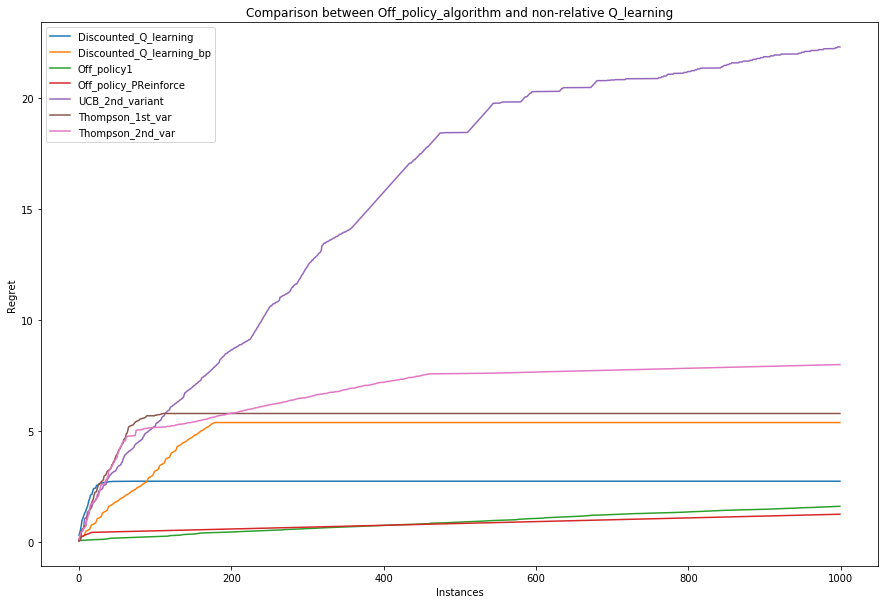

In [33]:
import matplotlib.pyplot as plt
optimal = 0.4274172185430461
plt.figure(figsize=(15,10));
plt.plot(np.cumsum(cost_avg1[0:1000])-np.arange(1,1001)*optimal);
plt.plot(np.cumsum(cost_avg2[0:1000])-np.arange(1,1001)*optimal);
plt.plot(np.cumsum(cost_avg3[0:1000])-np.arange(1,1001)*optimal);
plt.plot(np.cumsum(cost_avg4) - np.arange(1,1001)*optimal);
plt.plot(np.cumsum(cost_avg5) - np.arange(1,1001)*optimal);
plt.plot(np.cumsum(cost_avg6) - np.arange(1,1001)*optimal);
plt.plot(np.cumsum(cost_avg7) - np.arange(1,1001)*optimal);
plt.legend(['Discounted_Q_learning','Discounted_Q_learning_bp','Off_policy1','Off_policy_PReinforce','UCB_2nd_variant','Thompson_1st_var','Thompson_2nd_var']);
plt.title('Comparison between Off_policy_algorithm and non-relative Q_learning')
plt.xlabel('Instances');
plt.ylabel('Regret')
plt.show()

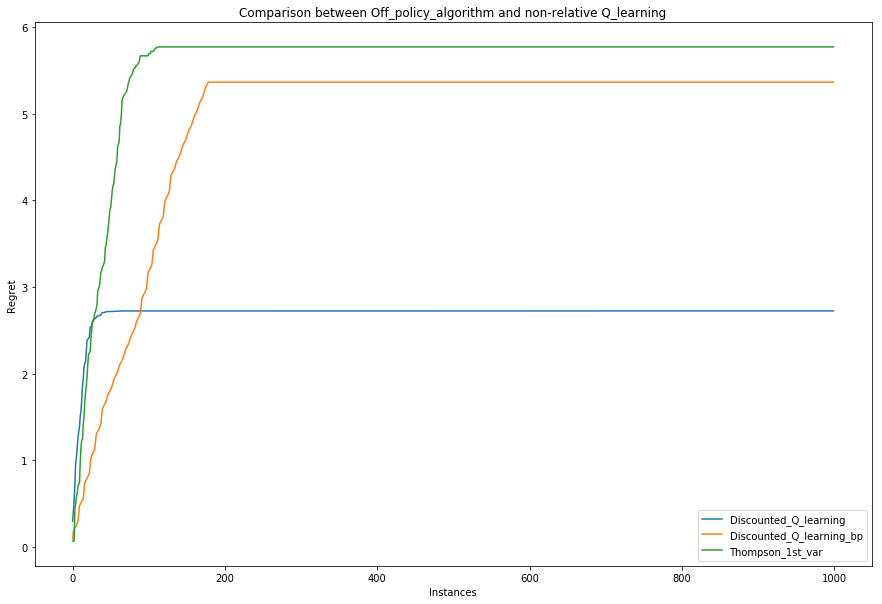

In [34]:
import matplotlib.pyplot as plt
optimal = 0.4274172185430461
plt.figure(figsize=(15,10));
plt.plot(np.cumsum(cost_avg1[0:1000])-np.arange(1,1001)*optimal);
plt.plot(np.cumsum(cost_avg2[0:1000])-np.arange(1,1001)*optimal);
#plt.plot(np.cumsum(cost_avg3[0:1000])-np.arange(1,1001)*optimal);
#plt.plot(np.cumsum(cost_avg4) - np.arange(1,1001)*optimal);
#plt.plot(np.cumsum(cost_avg5) - np.arange(1,1001)*optimal);
plt.plot(np.cumsum(cost_avg6) - np.arange(1,1001)*optimal);
#plt.plot(np.cumsum(cost_avg7) - np.arange(1,1001)*optimal);
plt.legend(['Discounted_Q_learning','Discounted_Q_learning_bp','Thompson_1st_var']);
plt.title('Comparison between Off_policy_algorithm and non-relative Q_learning')
plt.xlabel('Instances');
plt.ylabel('Regret')
plt.show()

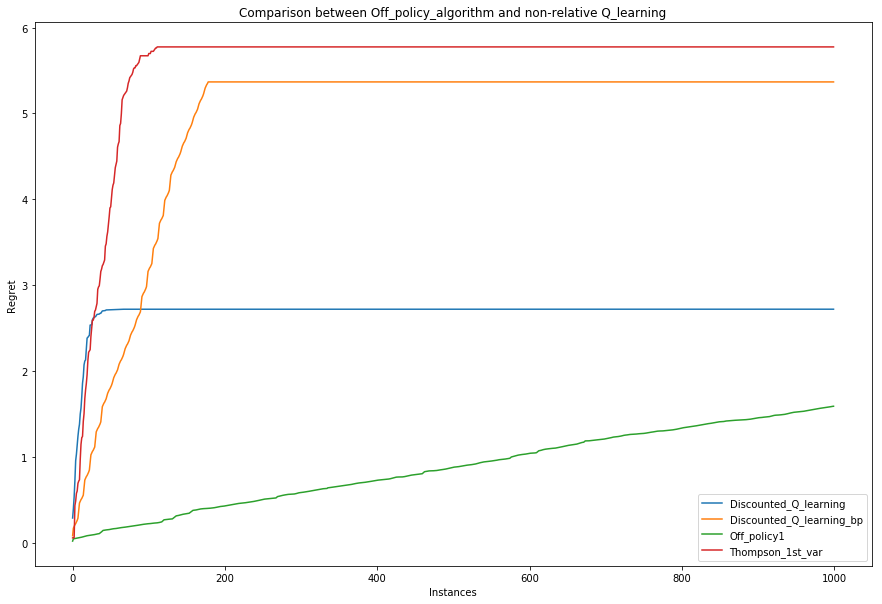

In [35]:
import matplotlib.pyplot as plt
optimal = 0.4274172185430461
plt.figure(figsize=(15,10));
plt.plot(np.cumsum(cost_avg1[0:1000])-np.arange(1,1001)*optimal);
plt.plot(np.cumsum(cost_avg2[0:1000])-np.arange(1,1001)*optimal);
plt.plot(np.cumsum(cost_avg3[0:1000])-np.arange(1,1001)*optimal);
#plt.plot(np.cumsum(cost_avg4) - np.arange(1,1001)*optimal);
#plt.plot(np.cumsum(cost_avg5) - np.arange(1,1001)*optimal);
plt.plot(np.cumsum(cost_avg6) - np.arange(1,1001)*optimal);
#plt.plot(np.cumsum(cost_avg7) - np.arange(1,1001)*optimal);
plt.legend(['Discounted_Q_learning','Discounted_Q_learning_bp','Off_policy1','Thompson_1st_var']);
plt.title('Comparison between Off_policy_algorithm and non-relative Q_learning')
plt.xlabel('Instances');
plt.ylabel('Regret')
plt.show()

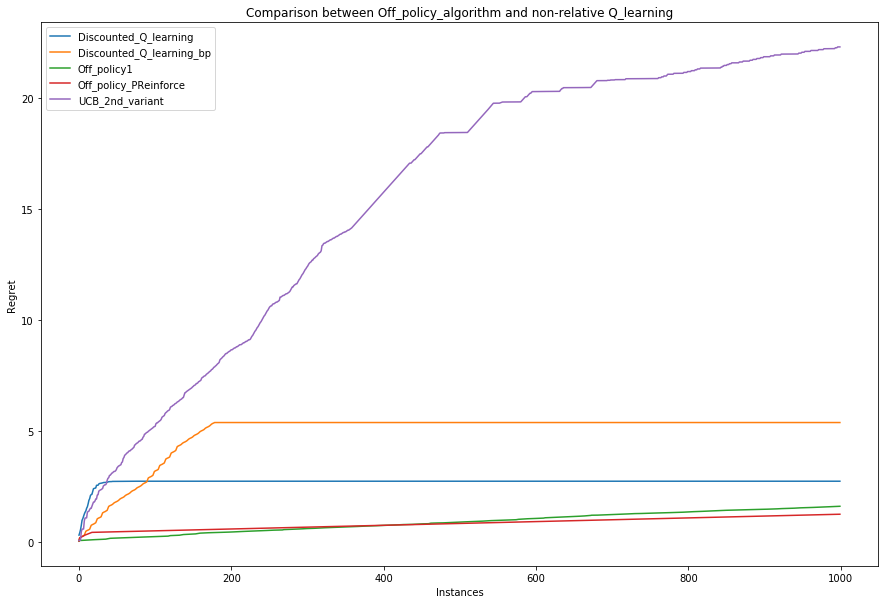

In [36]:
import matplotlib.pyplot as plt
optimal = 0.4274172185430461
plt.figure(figsize=(15,10));
plt.plot(np.cumsum(cost_avg1[0:1000])-np.arange(1,1001)*optimal);
plt.plot(np.cumsum(cost_avg2[0:1000])-np.arange(1,1001)*optimal);
plt.plot(np.cumsum(cost_avg3[0:1000])-np.arange(1,1001)*optimal);
plt.plot(np.cumsum(cost_avg4) - np.arange(1,1001)*optimal);
plt.plot(np.cumsum(cost_avg5) - np.arange(1,1001)*optimal);
#plt.plot(np.cumsum(cost_avg6) - np.arange(1,1001)*optimal);
#plt.plot(np.cumsum(cost_avg7) - np.arange(1,1001)*optimal);
plt.legend(['Discounted_Q_learning','Discounted_Q_learning_bp','Off_policy1','Off_policy_PReinforce','UCB_2nd_variant']);
plt.title('Comparison between Off_policy_algorithm and non-relative Q_learning')
plt.xlabel('Instances');
plt.ylabel('Regret')
plt.show()

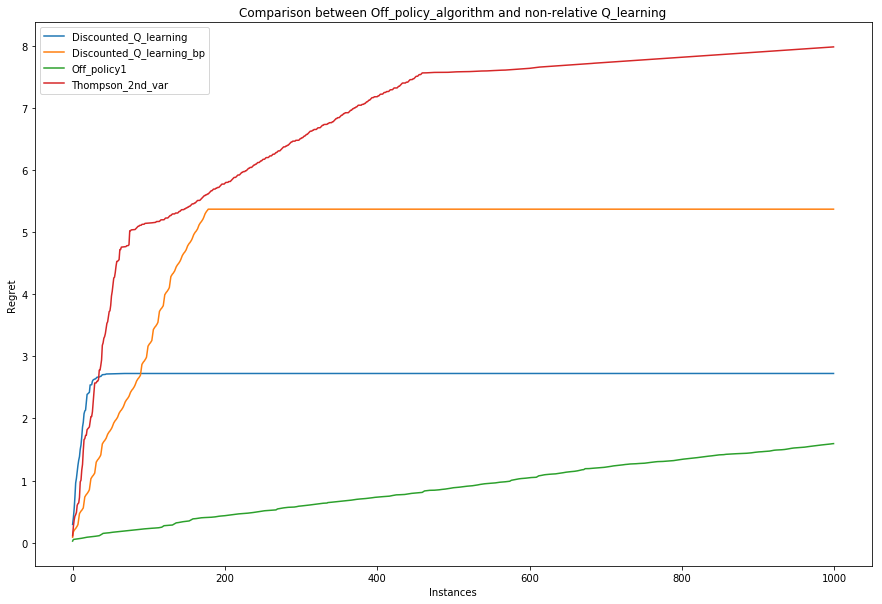

In [39]:
import matplotlib.pyplot as plt
optimal = 0.4274172185430461
plt.figure(figsize=(15,10));
plt.plot(np.cumsum(cost_avg1[0:1000])-np.arange(1,1001)*optimal);
plt.plot(np.cumsum(cost_avg2[0:1000])-np.arange(1,1001)*optimal);
plt.plot(np.cumsum(cost_avg3[0:1000])-np.arange(1,1001)*optimal);
#plt.plot(np.cumsum(cost_avg4) - np.arange(1,1001)*optimal);
#plt.plot(np.cumsum(cost_avg5) - np.arange(1,1001)*optimal);
#plt.plot(np.cumsum(cost_avg6) - np.arange(1,1001)*optimal);
plt.plot(np.cumsum(cost_avg7) - np.arange(1,1001)*optimal);
plt.legend(['Discounted_Q_learning','Discounted_Q_learning_bp','Off_policy1','Thompson_2nd_var']);
plt.title('Comparison between Off_policy_algorithm and non-relative Q_learning')
plt.xlabel('Instances');
plt.ylabel('Regret')
plt.show()